In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pyts.preprocessing import InterpolationImputer

## ZORI

In [6]:
zori = pd.read_csv('./data/cleandata/clean_zori.csv').drop('Unnamed: 0', axis = 1)

In [104]:
print(f"Data contains {pd.unique(zori['ZipCode']).shape[0]} unique zipcodes.")
print(f"Data contains {pd.unique(zori['County'] + ', ' + zori['State']).shape[0]} unique counties.")

Data contains 3264 unique zipcodes.
Data contains 313 unique counties.


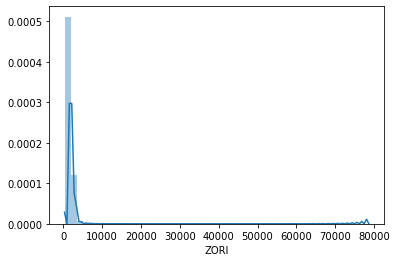

In [18]:
sns.distplot(zori['ZORI']); #Skewed right, i.e., a lot of outliers

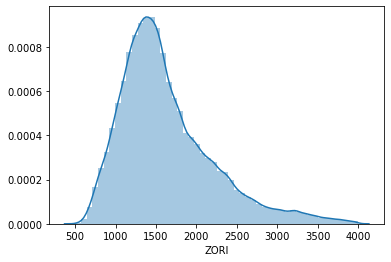

In [12]:
sns.distplot(zori[zori['ZORI'] <= 4000]['ZORI']);

In [85]:
print(f"Out of {zori.shape[0]} ZORI rows, {zori[zori['ZORI'] <= 4000].shape[0]} were less than $4,000.")

Out of 261120 ZORI rows, 247054 were less than $4,000.


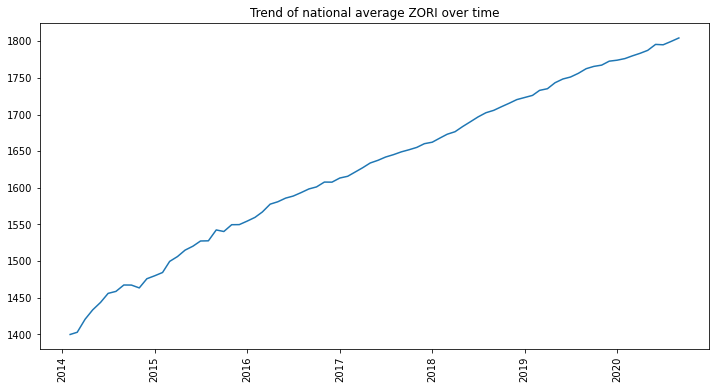

In [65]:
temp = zori[zori['ZORI'] <= 4000].groupby(['Year', 'Month']).mean()['ZORI'].reset_index()
temp['Year_Month'] = temp['Year'].map(str) + '_' + temp['Month'].map(str)
temp['Year_Month'] = pd.to_datetime(temp['Year_Month'], format = '%Y_%m')
temp = temp[['Year_Month', 'ZORI']]
plt.figure(figsize = (12, 6))
plt.plot(temp['Year_Month'], temp['ZORI'])
plt.xticks(rotation = 90)
plt.title('Trend of national average ZORI over time');

## HPI

In [46]:
hpi = pd.read_csv('./data/cleandata/clean_hpi.csv').drop('Unnamed: 0', axis = 1)

In [47]:
print(f"Data contains {pd.unique(hpi['ZipCode']).shape[0]} unique zipcodes.")

Data contains 14624 unique zipcodes.


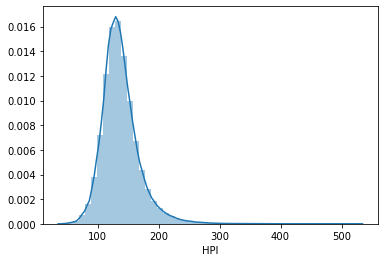

In [48]:
sns.distplot(hpi['HPI']); 

In [49]:
temp = pd.read_excel('./data/HPI_AT_BDL_ZIP5.xlsx', skiprows = 6)
temp = temp[temp['Year'] >= 2000]
temp = temp[['Five-Digit ZIP Code', 'Year', 'HPI with 2000 base']]
temp.columns = ['ZipCode', 'Year', 'HPI']
temp = temp[temp['HPI'] != '.']
temp['HPI'] = temp['HPI'].map(float)
temp = temp[temp['ZipCode'].isin(temp.groupby('ZipCode').count()['HPI'][temp.groupby('ZipCode').count()['HPI'] >= 15].index)]

In [50]:
temp2 = pd.DataFrame({'ZipCode': pd.unique(temp['ZipCode']).repeat(20), 
                      'Year': list(np.arange(2000, temp['Year'].max() + 1)) * len(pd.unique(temp['ZipCode']))})

In [51]:
temp = pd.merge(temp2, temp, on = ['ZipCode', 'Year'], how = 'left')

In [52]:
for zipcode, df in temp.groupby('ZipCode'):
    if df['HPI'].isnull().sum() == 0:
        continue
    else:
        imputer = InterpolationImputer()
        df['HPI'] = imputer.transform([list(df[['HPI']].reset_index()['index']), 
                                       list(df[['HPI']].reset_index()['HPI'])])[1]
        temp.loc[temp['ZipCode'] == zipcode, 'HPI'] = df['HPI']

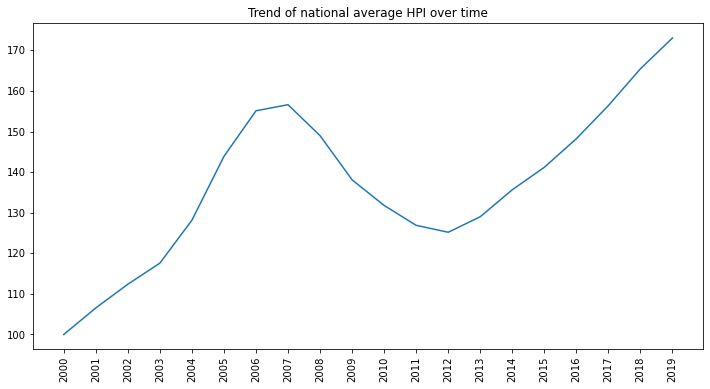

In [53]:
temp = temp.groupby('Year').mean()['HPI'].reset_index()
plt.figure(figsize = (12, 6))
plt.plot(temp['Year'], temp['HPI'])
plt.xticks(ticks = range(2000, 2020), rotation = 90)
plt.title('Trend of national average HPI over time');

## ZHVI

In [66]:
zhvi = pd.read_csv('./data/cleandata/clean_zhvi.csv').drop('Unnamed: 0', axis = 1)

In [105]:
print(f"Data contains {pd.unique(zhvi['ZipCode']).shape[0]} unique zipcodes.")
print(f"Data contains {pd.unique(zhvi['County'] + ', ' + zhvi['State']).shape[0]} unique counties.")

Data contains 30230 unique zipcodes.
Data contains 2943 unique counties.


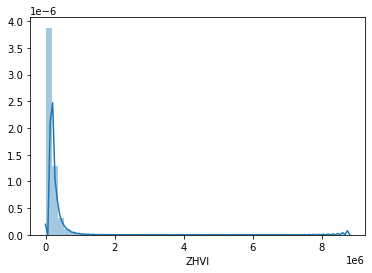

In [67]:
sns.distplot(zhvi['ZHVI']); #Skewed right, i.e., a lot of outliers

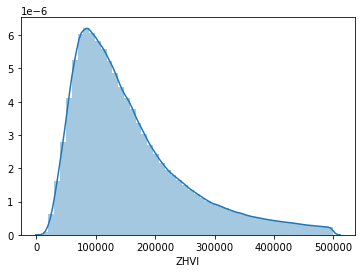

In [69]:
sns.distplot(zhvi[zhvi['ZHVI'] <= 0.5e6]['ZHVI']);

In [84]:
print(f"Out of {zhvi.shape[0]} ZHVI rows, {zhvi[zhvi['ZHVI'] <= 0.5e6].shape[0]} were less than $500,000.")

Out of 9008540 ZHVI rows, 6627611 were less than $500,000.


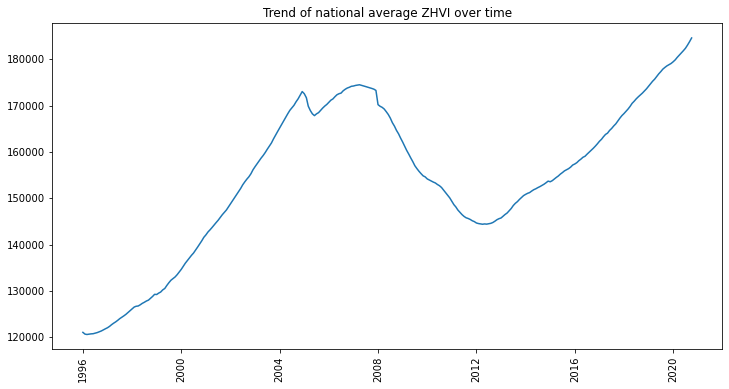

In [86]:
temp = zhvi[zhvi['ZHVI'] <= 0.5e6].groupby(['Year', 'Month']).mean()['ZHVI'].reset_index()
temp['Year_Month'] = temp['Year'].map(str) + '_' + temp['Month'].map(str)
temp['Year_Month'] = pd.to_datetime(temp['Year_Month'], format = '%Y_%m')
temp = temp[['Year_Month', 'ZHVI']]
plt.figure(figsize = (12, 6))
plt.plot(temp['Year_Month'], temp['ZHVI'])
plt.xticks(rotation = 90)
plt.title('Trend of national average ZHVI over time');

## Air Quality

In [54]:
airq = pd.read_csv('./data/cleandata/clean_airq.csv').drop('Unnamed: 0', axis = 1)

In [55]:
print(f"Data contains {pd.unique(airq['County'] + ', ' + airq['State']).shape[0]} unique counties.")

Data contains 1137 unique counties.


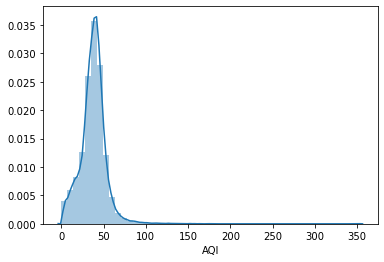

In [56]:
sns.distplot(airq['AQI']); #Skewed right, i.e., a lot of outliers

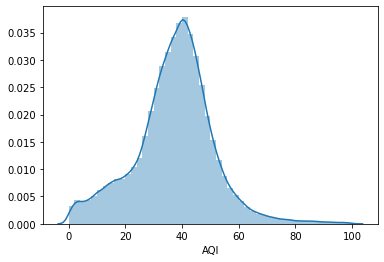

In [57]:
sns.distplot(airq[airq['AQI'] <= 100]['AQI']);

In [58]:
print(f"Out of {airq.shape[0]} AQI rows, {airq[airq['AQI'] <= 100].shape[0]} were less than 100.")

Out of 92047 AQI rows, 91622 were less than 100.


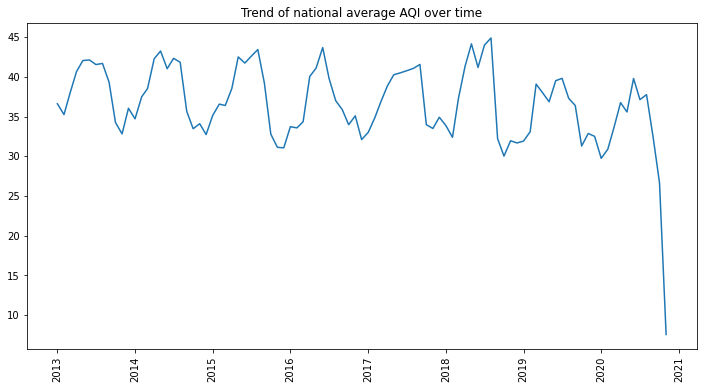

In [59]:
temp = airq[airq['AQI'] <= 100].groupby(['Year', 'Month']).mean()['AQI'].reset_index()
temp['Year_Month'] = temp['Year'].map(str) + '_' + temp['Month'].map(str)
temp['Year_Month'] = pd.to_datetime(temp['Year_Month'], format = '%Y_%m')
temp = temp[['Year_Month', 'AQI']]
plt.figure(figsize = (12, 6))
plt.plot(temp['Year_Month'], temp['AQI'])
plt.xticks(rotation = 90)
plt.title('Trend of national average AQI over time');

## Population

In [60]:
population = pd.read_csv('./data/cleandata/clean_population.csv').drop('Unnamed: 0', axis = 1)

In [61]:
print(f"Data contains {pd.unique(population['County'] + ', ' + population['State']).shape[0]} unique counties.")

Data contains 842 unique counties.


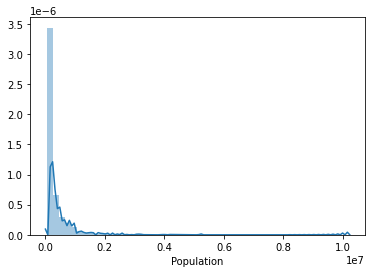

In [62]:
sns.distplot(population['Population']); #Skewed right, i.e., a lot of outliers

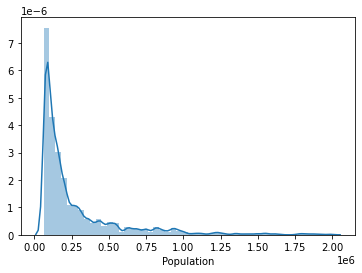

In [63]:
sns.distplot(population[population['Population'] <= 0.2e7]['Population']);

In [64]:
print(f"Out of {population.shape[0]} population rows, {population[population['Population'] <= 0.2e7].shape[0]}\
 were less than 200,000.")

Out of 79788 population rows, 78477 were less than 200,000.


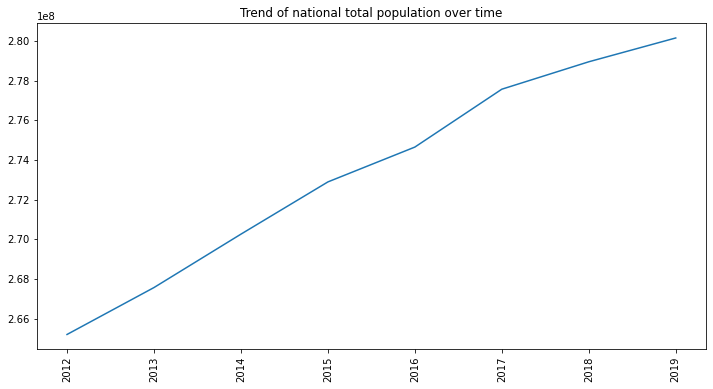

In [67]:
temp = population.groupby(['Year', 'Month']).sum()['Population'].reset_index()
temp = temp.groupby('Year').last().reset_index().drop('Month', axis = 1)
plt.figure(figsize = (12, 6))
plt.plot(temp['Year'], temp['Population'])
plt.xticks(rotation = 90)
plt.title('Trend of national total population over time');

## PCE

In [3]:
pce = pd.read_csv('./data/cleandata/clean_pce.csv').drop('Unnamed: 0', axis = 1)

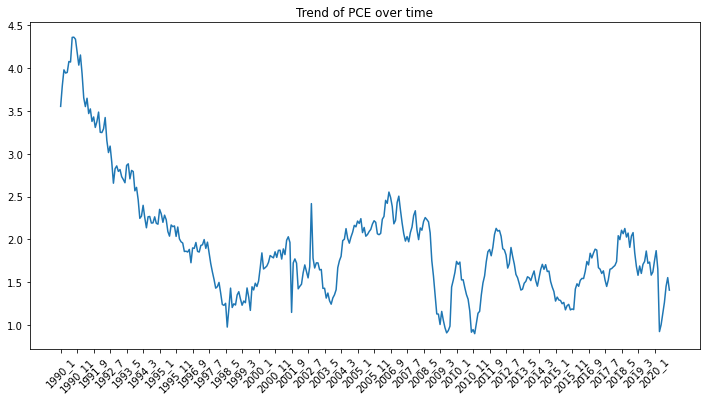

In [28]:
plt.figure(figsize = (12, 6))
plt.plot(pce['Year_Month'], pce['PCE'])
plt.xticks(ticks = [pce['Year_Month'][i] for i in pce['Year_Month'].index if i % 10 == 0], rotation = 45)
plt.title('Trend of PCE over time');

---

## Income and Household

In [68]:
IandH = pd.read_csv('./data/cleandata/clean_IandH.csv').drop('Unnamed: 0', axis = 1)

In [69]:
IandH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79812 entries, 0 to 79811
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   County            79812 non-null  object 
 1   State             79812 non-null  object 
 2   Year              79812 non-null  int64  
 3   Month             79812 non-null  int64  
 4   Total_Households  79812 non-null  float64
 5   Med_income        79812 non-null  float64
 6   Year_Month        79812 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 4.3+ MB


### Distibution of median income and number of households

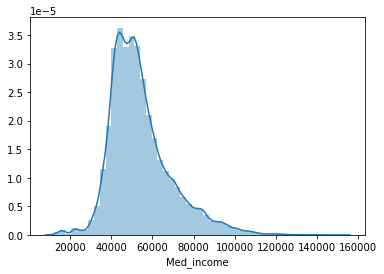

In [70]:
sns.distplot(IandH['Med_income']);

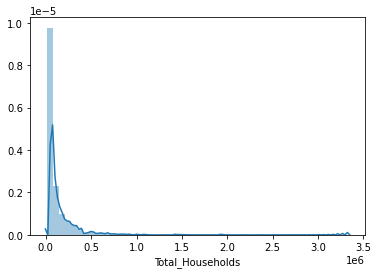

In [71]:
sns.distplot(IandH['Total_Households']);

Both features are skewed to the right indicating existing outliers that can distort data analysis and affect model performance 

### *top 10 counties with highest average household median income*

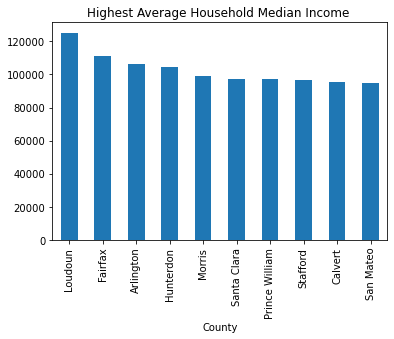

In [72]:
IandH.groupby('County')['Med_income'].mean().nlargest(10).plot.bar(title='Highest Average Household Median Income ');

top 10 counties with the highest average household median income between 2012 & 2019

### *Fastest Growing Counties by total households*

In [74]:
IandH['pct_ch'] = (IandH.groupby(['County','Year'])['Total_Households'].apply(pd.Series.pct_change) + 1)

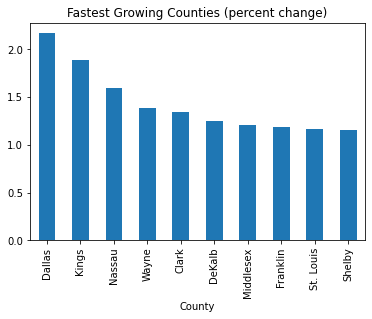

In [75]:
IandH.groupby('County')['pct_ch'].mean().nlargest(10).plot.bar(title='Fastest Growing Counties (percent change)');

Top 10 counties with the highest average percent change in total households between 2012 and 2019

In [76]:
cts = IandH.groupby('County')['pct_ch'].mean().nlargest(10).index.to_list()
bycounty = IandH.set_index('County').loc[cts]
bycounty.groupby('County')['Med_income'].mean().sort_values()

County
Wayne        44739.406786
DeKalb       48116.037962
Kings        49703.693488
Clark        52490.962638
Franklin     52882.999139
St. Louis    53478.841698
Shelby       57159.907668
Dallas       63202.678078
Nassau       77749.798532
Middlesex    80726.869173
Name: Med_income, dtype: float64

almost all of the counties are below the national median household income ($62,843)

In [77]:
bycounty.State.unique()

array(['IA', 'TX', 'CA', 'NY', 'FL', 'IN', 'MI', 'NC', 'OH', 'NV', 'WA',
       'AL', 'GA', 'IL', 'CT', 'MA', 'NJ', 'MO', 'PA', 'MN', 'TN'],
      dtype=object)

## Job openings

In [78]:
jobs = pd.read_csv('./data/modified_jos.csv').drop('Unnamed: 0', axis = 1)

In [79]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5202 entries, 0 to 5201
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      5100 non-null   object 
 1   Region                     5202 non-null   object 
 2   Job Openings               5202 non-null   int64  
 3   Hires                      5202 non-null   int64  
 4   Quits                      5202 non-null   int64  
 5   Layoffs & Discharges       5202 non-null   int64  
 6   Total Separations          5202 non-null   int64  
 7   Job Openings Rate          5202 non-null   float64
 8   Hires Rate                 5202 non-null   float64
 9   Quits Rate                 5202 non-null   float64
 10  Layoffs & Discharges Rate  5202 non-null   float64
 11  Total Separations Rate     5202 non-null   float64
 12  Year                       5202 non-null   int64  
 13  Month                      5202 non-null   int64

### States average job openings rate 

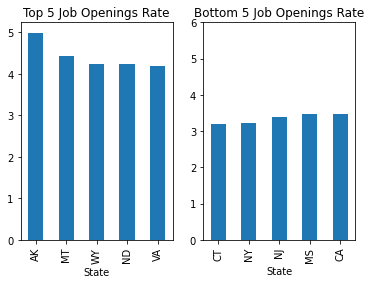

In [80]:
plt.subplot(1, 2, 1)
jobs.groupby('State')['Job Openings Rate'].mean().nlargest(5).plot.bar(title='Top 5 Job Openings Rate')
plt.subplot(1, 2, 2)
jobs.groupby('State')['Job Openings Rate'].mean().nsmallest(5).plot.bar(title='Bottom 5 Job Openings Rate')
plt.ylim((0,6))
plt.show();

- Top 5: Alaska, Montana, Wyoming, North Dakota, and Virginia
- Bottom 5: Connecticut, DC, New York, New Jersey, Mississipi 

### States average hire rate 

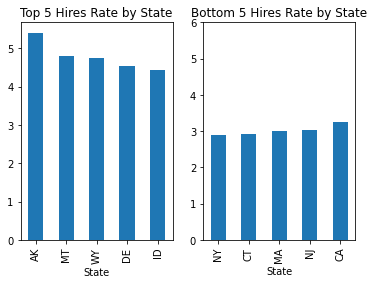

In [81]:
plt.subplot(1, 2, 1)
jobs.groupby('State')['Hires Rate'].mean().nlargest(5).plot.bar(title='Top 5 Hires Rate by State')
plt.subplot(1, 2, 2)
jobs.groupby('State')['Hires Rate'].mean().nsmallest(5).plot.bar(title='Bottom 5 Hires Rate by State')
plt.ylim((0,6))
plt.show();

## Unemployment

In [2]:
unemployment = pd.read_csv('./data/cleandata/clean_unemployment.csv').drop('Unnamed: 0', axis = 1)

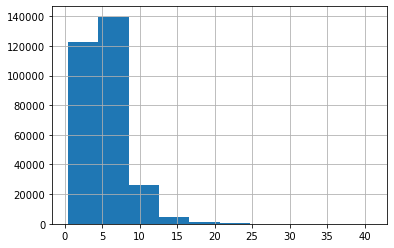

In [6]:
unemployment['Unemployment'].hist();

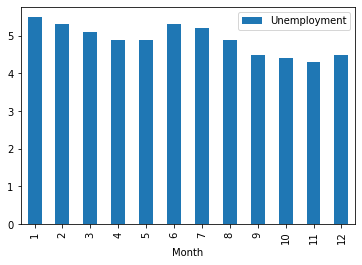

In [7]:
#visulize seasonal change in employment
unemployment.groupby('Month')[['Unemployment']].median().reset_index().plot(x='Month', y='Unemployment', kind='bar');

In [13]:
temp = pd.merge(zori, unemployment, on = ['County', 'State', 'Year_Month'])

In [15]:
temp

ZipCode    County State    ZORI  Year_x  Month_x Year_Month  \
0         10025  New York    NY  3020.0    2014        2     2014_2   
1         10023  New York    NY  3145.0    2014        2     2014_2   
2         10002  New York    NY  2750.0    2014        2     2014_2   
3         10016  New York    NY  3138.0    2014        2     2014_2   
4         10029  New York    NY  2098.0    2014        2     2014_2   
...         ...       ...   ...     ...     ...      ...        ...   
253435    20186  Fauquier    VA  1543.0    2020        5     2020_5   
253436    20186  Fauquier    VA  1548.0    2020        6     2020_6   
253437    20186  Fauquier    VA  1552.0    2020        7     2020_7   
253438    20186  Fauquier    VA  1558.0    2020        8     2020_8   
253439    20186  Fauquier    VA  1563.0    2020        9     2020_9   

        Unemployment  Year_y  Month_y  
0                7.1    2014        2  
1                7.1    2014        2  
2                7.1    2014        2  
3                7.1    2014        2  
4                7.1    2014        2  
...              ...     ...      ...  
253435           6.9    2020        5  
253436           6.2    2020        6  
253437           5.7    2020        7  
253438           4.4    2020        8  
253439           4.2    2020        9  

[253440 rows x 10 columns]

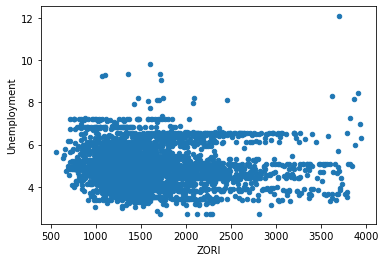

In [16]:
#no obvious correlation between unemployment and ZORI
temp[temp['ZORI']<4000].groupby('ZipCode')[['Unemployment', 'ZORI']].mean().reset_index().plot(x='ZORI', y='Unemployment', kind='scatter');

In [17]:
temp[temp['ZORI']<4000][['Unemployment','ZORI']].corr()

Unemployment    ZORI
Unemployment        1.0000 -0.0218
ZORI               -0.0218  1.0000

## Units (units with construction permits application)

In [18]:
permits = pd.read_csv('./data/cleandata/clean_permits.csv').drop('Unnamed: 0', axis = 1)

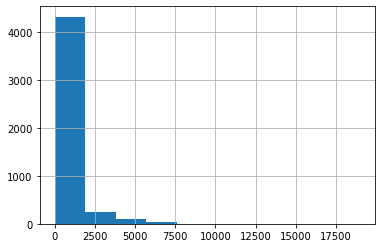

In [19]:
permits['Units'].hist();

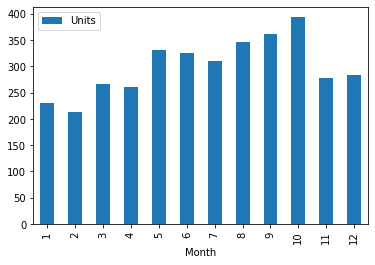

In [21]:
#visulize seasonal change in applications
permits.groupby('Month')[['Units']].median().reset_index().plot(x='Month', y='Units', kind='bar');

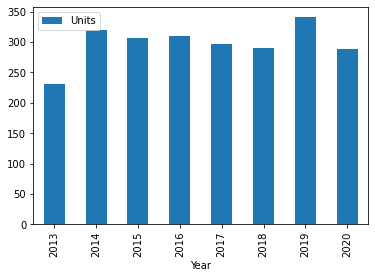

In [23]:
#change in applications by year
permits.groupby('Year')[['Units']].median().reset_index().plot(x='Year', y='Units', kind='bar');

In [26]:
temp = pd.merge(zori, permits, on = ['State', 'Year_Month'])

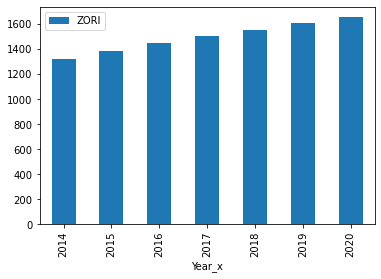

In [32]:
temp.groupby('Year_x')[['ZORI']].median().reset_index().plot(x='Year_x', y='ZORI', kind='bar');

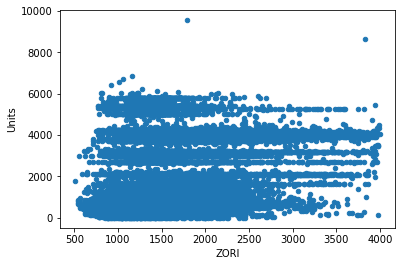

In [35]:
temp[temp['ZORI']<4000].groupby(['ZipCode','Year_x'])[['Units', 'ZORI']].mean().reset_index().plot(x='ZORI', y='Units', kind='scatter');

In [36]:
temp[temp['ZORI']<4000][['Units','ZORI']].corr()

Units      ZORI
Units  1.000000  0.256679
ZORI   0.256679  1.000000

## Education

In [2]:
education = pd.read_csv('./data/cleandata/clean_education.csv').drop('Unnamed: 0', axis = 1)

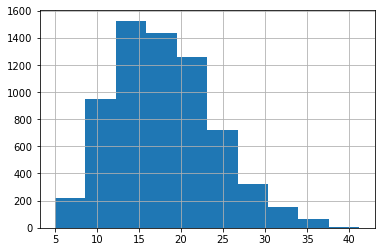

In [3]:
education['Percent Bachelors'].hist();

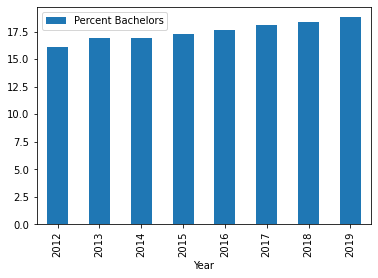

In [4]:
education.groupby('Year')[['Percent Bachelors']].median().reset_index().plot(x='Year', y='Percent Bachelors', kind='bar');

In [7]:
temp = pd.merge(zori, education, on = ['County', 'State', 'Year'])

In [8]:
temp[temp['ZORI']<4000][['Percent Bachelors','ZORI']].corr()

Percent Bachelors      ZORI
Percent Bachelors           1.000000  0.347955
ZORI                        0.347955  1.000000

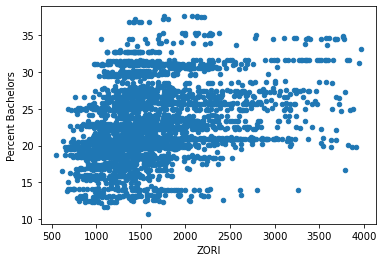

In [9]:
#no obvious correlation between unemployment and ZORI
temp[temp['ZORI']<4000].groupby('ZipCode')[['Percent Bachelors', 'ZORI']].mean().reset_index().plot(x='ZORI', y='Percent Bachelors', kind='scatter');

In [10]:
temp[temp['ZORI']<4000].groupby(['ZipCode','Year'])['ZORI'].mean().unstack('Year')

Year            2014         2015         2016         2017         2018  \
ZipCode                                                                    
1432      977.875000  1060.333333  1084.555556  1130.454545  1183.100000   
1603     1171.888889  1170.111111  1285.000000  1292.000000  1362.250000   
1604     1070.181818  1148.250000  1210.583333  1246.500000  1327.416667   
1605     1044.625000  1112.416667  1182.833333  1244.833333  1342.583333   
1609      985.714286  1025.333333  1082.250000  1161.700000  1254.166667   
...              ...          ...          ...          ...          ...   
99204     636.800000   711.625000   760.000000   815.000000   904.000000   
99205     742.200000   753.750000   826.818182   917.583333  1026.272727   
99206     859.125000   942.166667  1005.727273  1069.250000  1122.333333   
99207     878.125000   841.000000   852.500000   916.000000   956.416667   
99208     870.375000   967.166667  1030.750000  1115.083333  1211.833333   

Year            2019  
ZipCode               
1432     1232.250000  
1603     1412.111111  
1604     1407.500000  
1605     1433.416667  
1609     1316.500000  
...              ...  
99204     976.416667  
99205    1084.416667  
99206    1231.750000  
99207     995.818182  
99208    1289.750000  

[3129 rows x 6 columns]